In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
import pandas as pd
wine_dataset = pd.read_csv('winequality-red.csv')


In [7]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [8]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# checking for missing values
wine_dataset.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# statistical measures of the dataset
wine_dataset.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


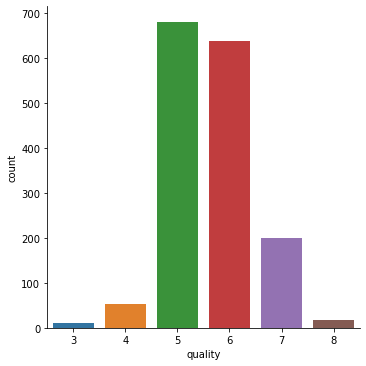

In [11]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

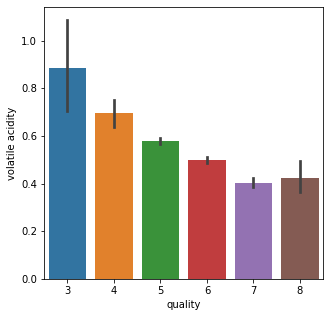

In [12]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

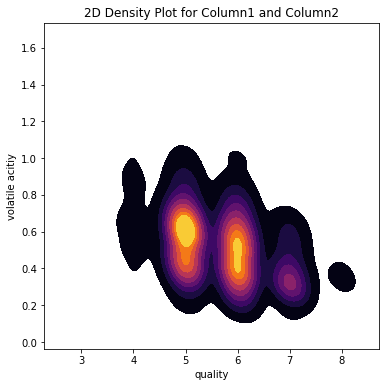

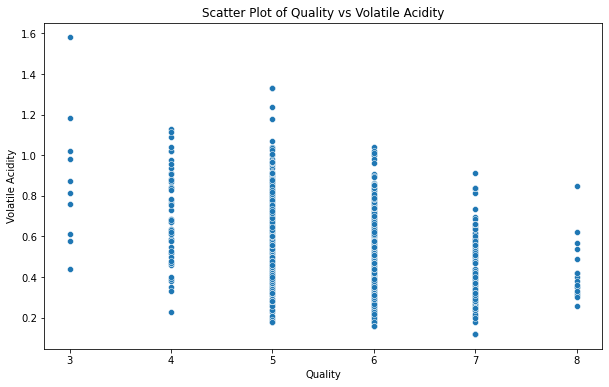

<ipython-input-13-de64554aa737>:47: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


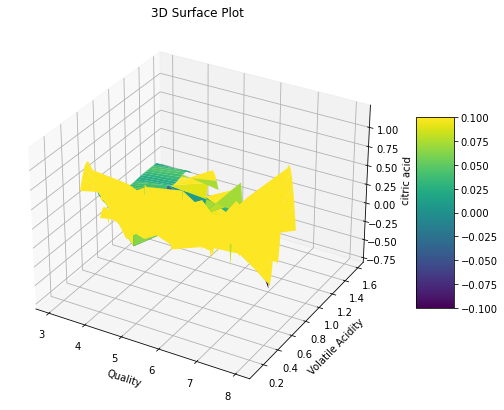

<ipython-input-13-de64554aa737>:114: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-13-de64554aa737>:119: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


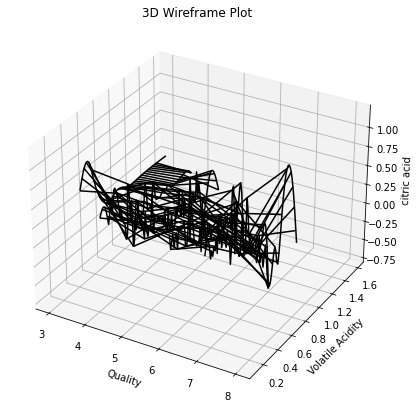

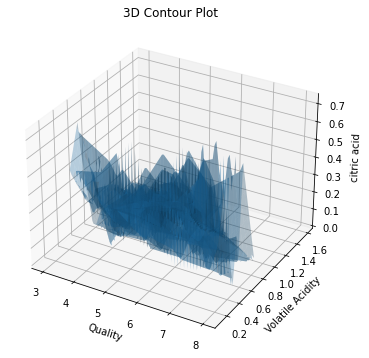

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Column1', 'Column2' are the columns you selected
plt.figure(figsize=(6, 6))
sns.kdeplot(data=wine_dataset, x="quality", y="volatile acidity", cmap="inferno", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('quality')
plt.ylabel('volatile acitiy')
plt.show()

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality', y='volatile acidity', data=wine_dataset)

# Adding title and labels
plt.title('Scatter Plot of Quality vs Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

# Displaying the plot
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()


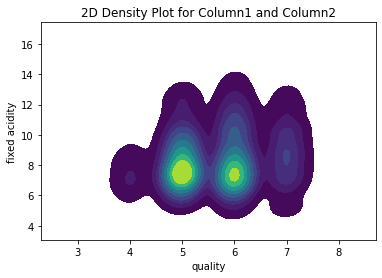

<ipython-input-14-2d7f87e79042>:30: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


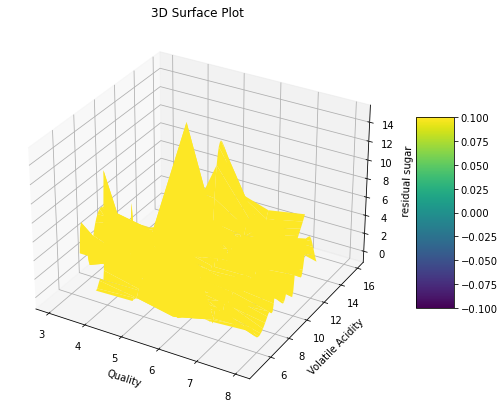

<ipython-input-14-2d7f87e79042>:97: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-14-2d7f87e79042>:102: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


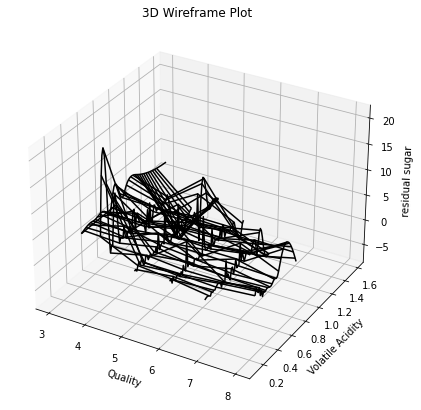

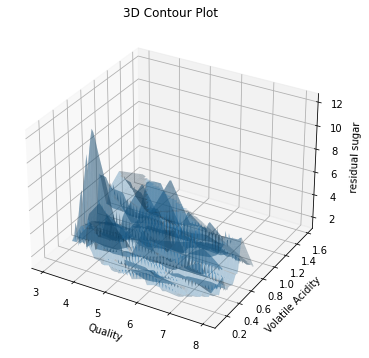

In [14]:
sns.kdeplot(data=wine_dataset, x="quality", y="fixed acidity", cmap="viridis", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['residual sugar']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')
ax.set_title('3D Contour Plot')

plt.show()


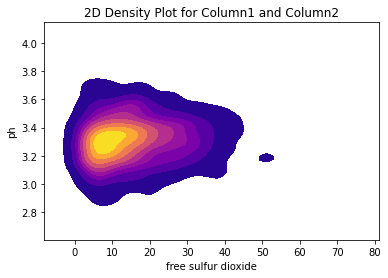

<ipython-input-35-3b0e8d4e01ba>:31: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


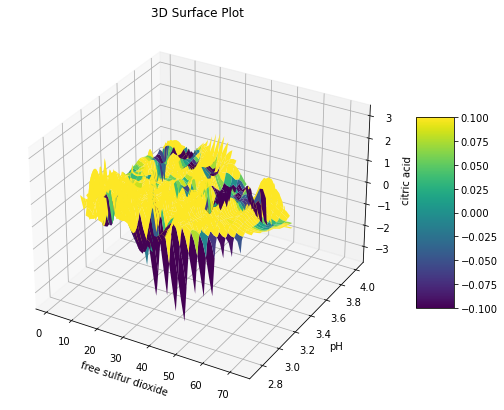

<ipython-input-35-3b0e8d4e01ba>:98: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-35-3b0e8d4e01ba>:103: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


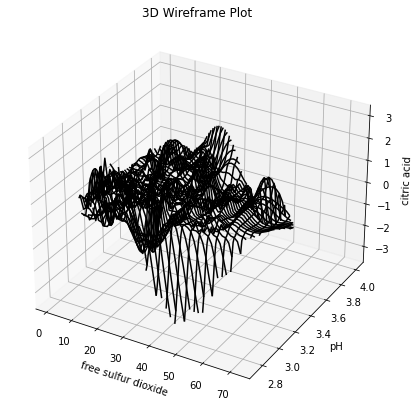

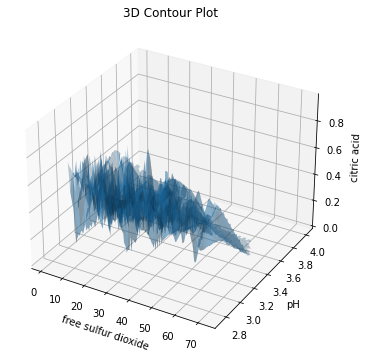

In [35]:
sns.kdeplot(data=wine_dataset, x="free sulfur dioxide", y="pH", cmap="plasma", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('free sulfur dioxide')
plt.ylabel('ph')
plt.show()

!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'free sulfur dioxide' and 'pH' columns
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'free sulfur dioxide' and 'pH' columns
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

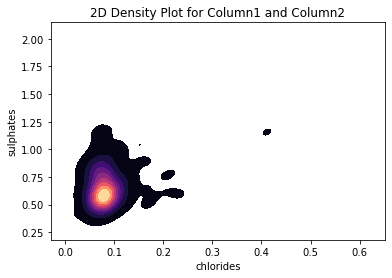

<ipython-input-36-50b3af02d8f9>:31: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


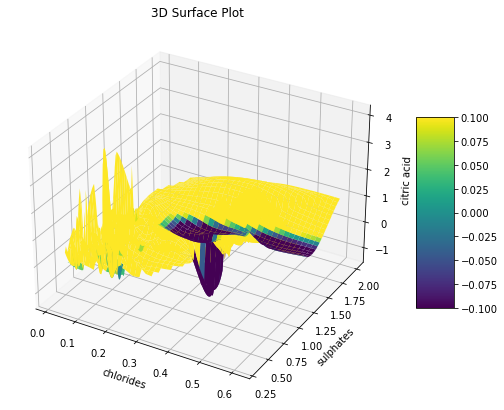

<ipython-input-36-50b3af02d8f9>:98: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-36-50b3af02d8f9>:103: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


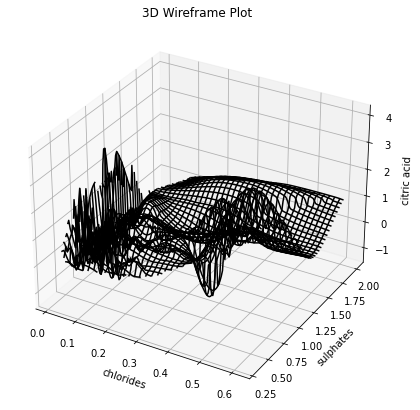

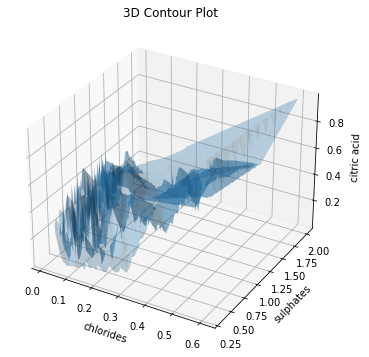

In [36]:
sns.kdeplot(data=wine_dataset, x="chlorides", y="sulphates", cmap="magma", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('chlorides')
plt.ylabel('sulphates')
plt.show()

!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'chlorides' and 'sulphates' columns
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'chlorides' and 'sulphates' columns
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

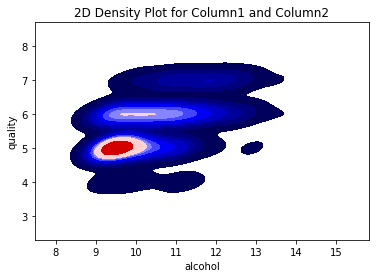

In [17]:
sns.kdeplot(data=wine_dataset, x="alcohol", y="quality", cmap="seismic", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

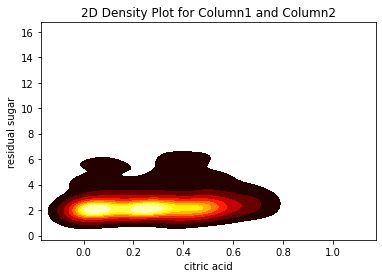

<ipython-input-18-60806246a1b8>:30: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


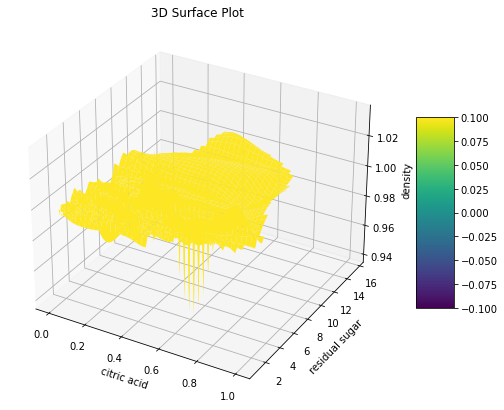

<ipython-input-18-60806246a1b8>:97: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-18-60806246a1b8>:102: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


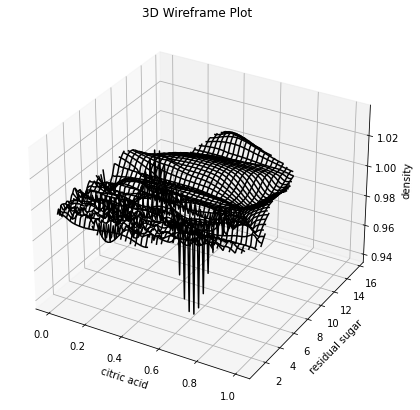

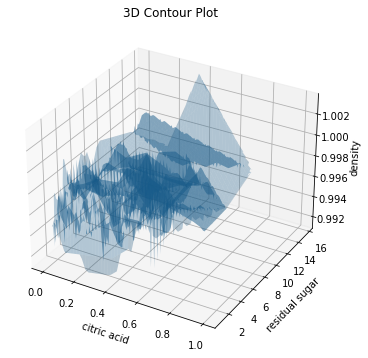

In [18]:
sns.kdeplot(data=wine_dataset, x="citric acid", y="residual sugar", cmap="hot", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('citric acid')
plt.ylabel('residual sugar')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citic acid' and 'residual sugar' columns
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citic acid' and 'residual sugar' columns
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')
ax.set_title('3D Contour Plot')

plt.show()

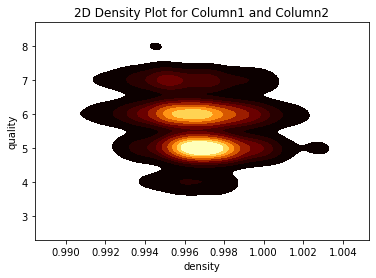

<ipython-input-33-5676f1035eda>:30: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


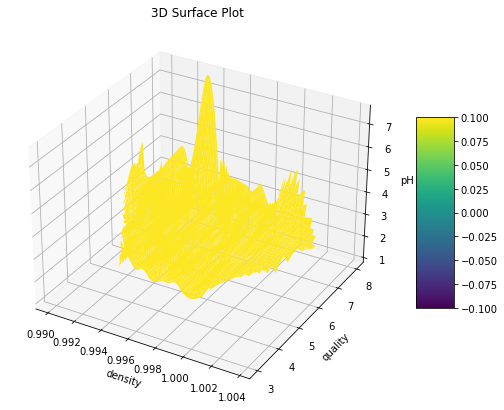

<ipython-input-33-5676f1035eda>:66: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


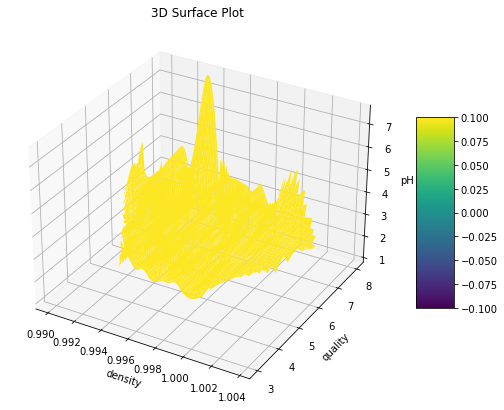

<ipython-input-33-5676f1035eda>:133: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-33-5676f1035eda>:138: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


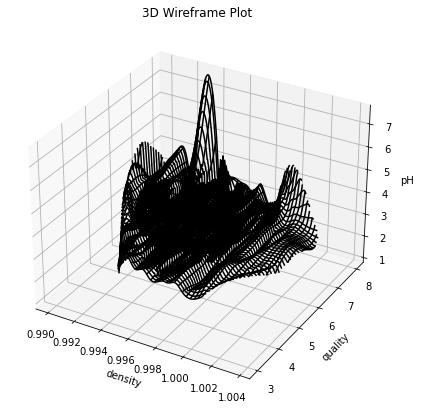

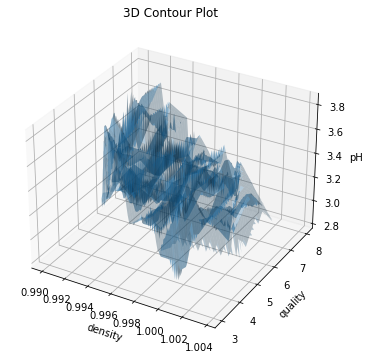

In [33]:
sns.kdeplot(data=wine_dataset, x="density", y="quality", cmap="afmhot", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('density')
plt.ylabel('quality')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')
ax.set_title('3D Contour Plot')

plt.show()


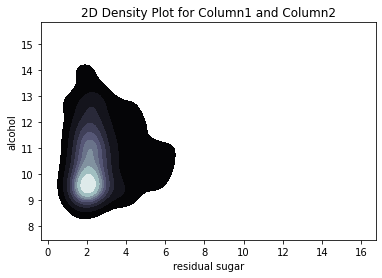

<ipython-input-21-de0b56535182>:31: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


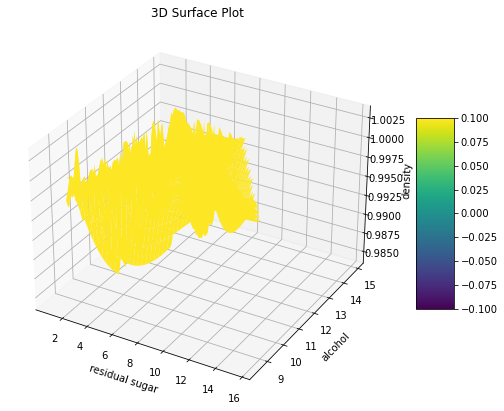

<ipython-input-21-de0b56535182>:98: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-21-de0b56535182>:103: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


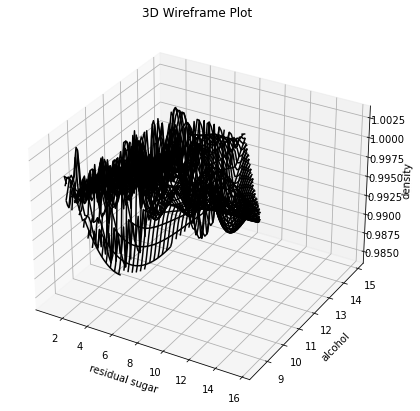

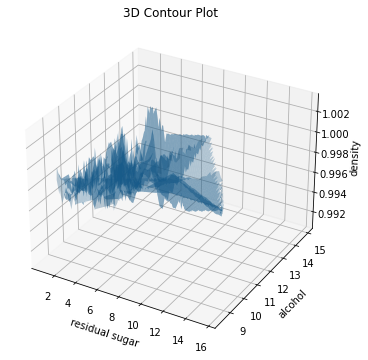

In [21]:
sns.kdeplot(data=wine_dataset, x="residual sugar", y="alcohol", cmap="bone", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()
#density
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'residual sugar' and 'alcohol' columns
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'residual sugar' and 'alcohol' columns
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')
ax.set_title('3D Contour Plot')

plt.show()

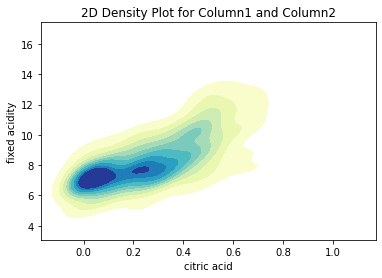

<ipython-input-51-c13647bdb2d5>:30: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


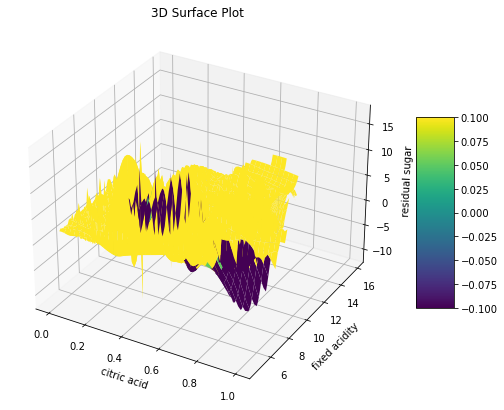

<ipython-input-51-c13647bdb2d5>:97: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, alpha=0.3)
<ipython-input-51-c13647bdb2d5>:102: UserWarning: No contour levels were found within the data range.
  ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)


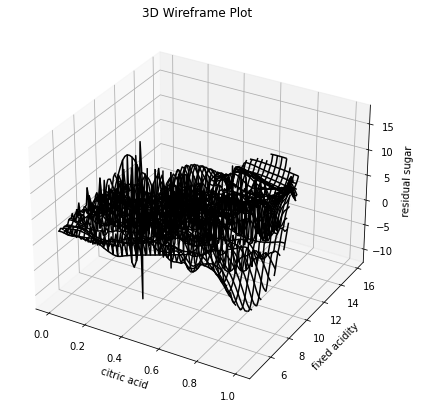

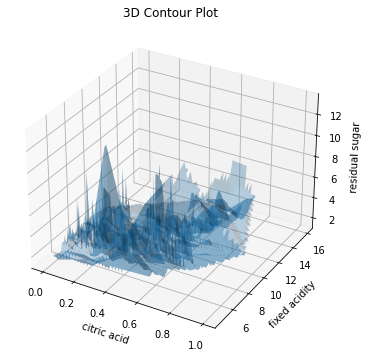

In [51]:
sns.kdeplot(data=wine_dataset, x="citric acid", y="fixed acidity", cmap="YlGnBu", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citric acid' and 'fixed acidity' columns
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citric acid' and 'fixed acidity' columns
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')
ax.set_title('3D Contour Plot')

plt.show()

In [22]:
correlation = wine_dataset.corr()

<AxesSubplot:>

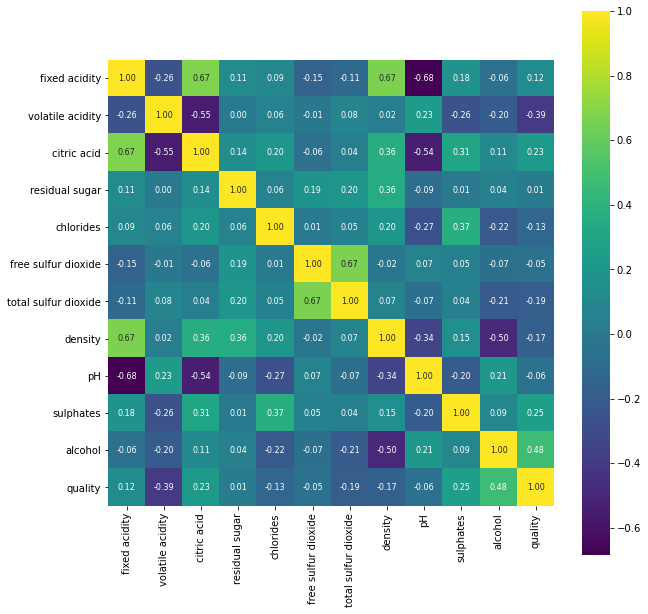

In [23]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'viridis')

In [24]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [25]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [27]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [28]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [31]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine
